In [1]:
WTapouP_angles = []
WTapoS1P_angles = []
WTapoSEP_angles = []


In [2]:
import msmexplorer as msme
%matplotlib inline

/Users/je714/miniconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/Users/je714/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/je714/miniconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
angle_names = [
    'cTnI H1-H2 angle',
    'cTnT H1-H2 angle',
    'cTnT H2-T2 angle',
]

In [4]:
for f in glob('WTapouP/*dat'):
    a = np.loadtxt(f, skiprows=0, usecols=1)
    WTapouP_angles.append(a)

In [5]:
WTapouP_angles[0]

array([ 155.2033,  151.956 ,  149.875 , ...,  154.9754,  156.4395,
        156.9497])

In [6]:
for f in glob('WTapoS1P/*dat'):
    a = np.loadtxt(f, skiprows=0, usecols=1)
    WTapoS1P_angles.append(a)

In [7]:
for f in glob('WTapoSEP/*dat'):
    a = np.loadtxt(f, skiprows=0, usecols=1)
    WTapoSEP_angles.append(a)

(<matplotlib.figure.Figure at 0x11545ef98>,
 (<matplotlib.axes._subplots.PolarAxesSubplot at 0x1010ac2e8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1010e6860>))

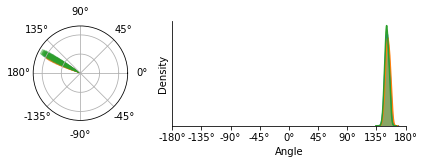

In [8]:
f, (l, r)= msme.plot_angle(WTapouP_angles[0])
msme.plot_angle(WTapoS1P_angles[0], ax1=l, ax2=r)
msme.plot_angle(WTapoSEP_angles[0], ax1=l, ax2=r)

In [9]:
import matplotlib.patches as mpatches

In [10]:
p1 = mpatches.Patch(label='WT apo uP', color='tab:blue')
p2 = mpatches.Patch(label='WT apo S1P', color='tab:orange')
p3 = mpatches.Patch(label='WT apo SEP', color='tab:green')

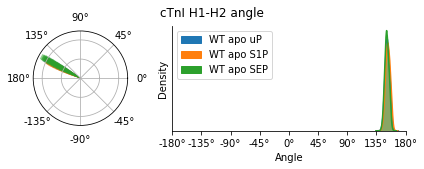

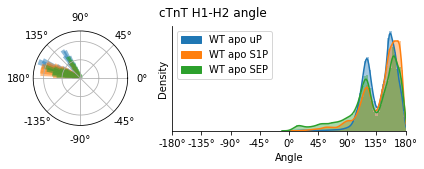

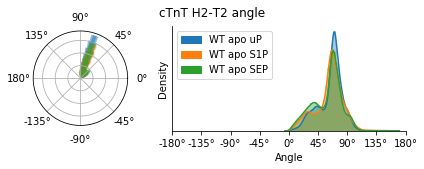

In [11]:
for i in range(len(angle_names)):
    f, (l, r)= msme.plot_angle(WTapouP_angles[i], title=angle_names[i])
    msme.plot_angle(WTapoS1P_angles[i], ax1=l, ax2=r)
    msme.plot_angle(WTapoSEP_angles[i], ax1=l, ax2=r)
    plt.legend(handles=[p1, p2, p3], loc='best')
    plt.show()
    f.savefig(''.join(angle_names[i].split()) + '.pdf')
    plt.clf()

In [23]:
for i in range(len(angle_names)):
    angle = angle_names[i]
    print(angle)
    auP = WTapouP_angles[i]
    print('WT apo uP: {0:.2f} ({1:.2f})'.format(auP.mean(), auP.std()))
    
    aS1P = WTapoS1P_angles[i]
    print('WT apo S1P: {0:.2f} ({1:.2f})'.format(aS1P.mean(), aS1P.std()))
    
    aSEP = WTapoSEP_angles[i]
    print('WT apo SEP: {0:.2f} ({1:.2f})'.format(aSEP.mean(), aSEP.std()))
   
    

cTnI H1-H2 angle
WT apo uP: 151.88 (3.55)
WT apo S1P: 152.84 (3.69)
WT apo SEP: 151.17 (3.33)
cTnT H1-H2 angle
WT apo uP: 141.28 (23.42)
WT apo S1P: 143.18 (28.30)
WT apo SEP: 130.55 (38.58)
cTnT H2-T2 angle
WT apo uP: 63.96 (18.99)
WT apo S1P: 62.20 (21.45)
WT apo SEP: 59.22 (22.39)


In [34]:

import numpy as np
from matplotlib import pyplot as plt
from msmexplorer import plot_trace
from msmbuilder.io import load_trajs, load_meta
from matplotlib.ticker import FuncFormatter
from plot_utils import cleanup_top_right_axes
from cycler import cycler
from random import shuffle
import pandas as pd
from plot_utils import figure_dims
import matplotlib.gridspec as gridspec
import seaborn.apionly as sns
import matplotlib.patches as mpatches

In [33]:
from traj_utils import split_trajs_by_type

In [35]:
meta_sepa = load_meta('../WT_apo_meta.pickl')

In [25]:
# Load
meta, dtrajs = load_trajs('dtrajs')

dihed_names = [
    'cTnI dihedral',
    'cTnT dihedral'
]

In [108]:
dtrajs_deg = {}
for k, v in dtrajs.items():
    dtrajs_deg[k] = np.rad2deg(v)

In [37]:
spdtrajs = split_trajs_by_type(dtrajs, meta_sepa)

In [46]:
wtapoup = np.rad2deg(np.concatenate(list(spdtrajs['WT apo uP'].values())))
wtapos1p = np.rad2deg(np.concatenate(list(spdtrajs['WT apo S1P'].values())))
wtaposep = np.rad2deg(np.concatenate(list(spdtrajs['WT apo SEP'].values())))

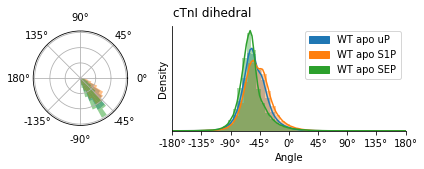

cTnI dihedral
WT apo uP: -52.75 (20.38)
WT apo S1P: -47.89 (21.59)
WT apo SEP: -57.60 (20.47)


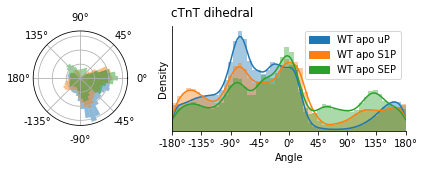

cTnT dihedral
WT apo uP: -37.60 (85.50)
WT apo S1P: -27.85 (91.22)
WT apo SEP: -5.40 (92.61)


In [53]:
for i in range(2):
    f, (l, r)= msme.plot_angle(wtapoup[:, i], title=dihed_names[i])
    msme.plot_angle(wtapos1p[:, i], ax1=l, ax2=r)
    msme.plot_angle(wtaposep[:, i], ax1=l, ax2=r)
    plt.legend(handles=[p1, p2, p3], loc='best')
    plt.show()
    
    print(dihed_names[i])
    
    auP = wtapoup[:, i]
    print('WT apo uP: {0:.2f} ({1:.2f})'.format(auP.mean(), auP.std()))

    aS1P = wtapos1p[:, i]
    print('WT apo S1P: {0:.2f} ({1:.2f})'.format(aS1P.mean(), aS1P.std()))

    aSEP = wtaposep[:, i]
    print('WT apo SEP: {0:.2f} ({1:.2f})'.format(aSEP.mean(), aSEP.std()))
    
    f.savefig(''.join(dihed_names[i].split()) + '.pdf')
    plt.clf()

In [61]:
xtal_dheds = np.array([-72.56789398, -81.86692047])

[Text(0,0.5,'cTnT dihedral'),
 Text(0.5,0,'cTnI dihedral'),
 Text(0.5,1,'WT apo uP')]

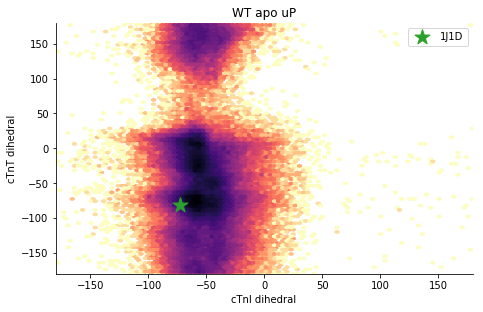

In [79]:
f, ax = plt.subplots(figsize=figure_dims(600, 0.9))
ax.hexbin(wtapoup[:, 0], wtapoup[:, 1], cmap='magma_r', mincnt=1, bins='log')
ax.scatter(xtal_dheds[0], xtal_dheds[1], label='1J1D', marker='*', s=250, color='tab:green')
sns.despine()
plt.legend(loc='best')
ax.set(xlabel=dihed_names[0], ylabel=dihed_names[1], title='WT apo uP')

[Text(0,0.5,'cTnT dihedral'),
 Text(0.5,0,'cTnI dihedral'),
 Text(0.5,1,'WT apo S1P')]

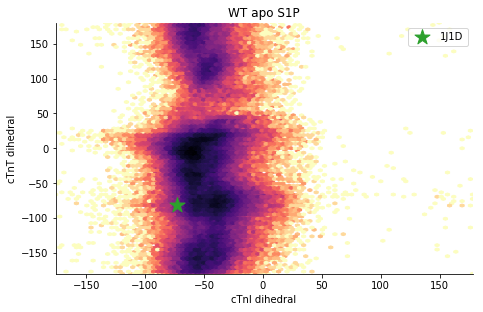

In [80]:
f, ax = plt.subplots(figsize=figure_dims(600, 0.9))
ax.hexbin(wtapos1p[:, 0], wtapos1p[:, 1], cmap='magma_r', mincnt=1, bins='log')
ax.scatter(xtal_dheds[0], xtal_dheds[1], label='1J1D', marker='*', s=250, color='tab:green')
sns.despine()
plt.legend(loc='best')
ax.set(xlabel=dihed_names[0], ylabel=dihed_names[1], title='WT apo S1P')

[Text(0,0.5,'cTnT dihedral'),
 Text(0.5,0,'cTnI dihedral'),
 Text(0.5,1,'WT apo SEP')]

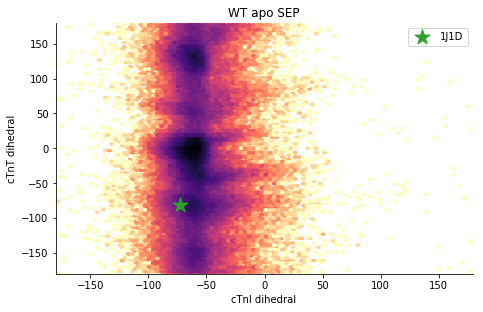

In [81]:
f, ax = plt.subplots(figsize=figure_dims(600, 0.9))
ax.hexbin(wtaposep[:, 0], wtaposep[:, 1], cmap='magma_r', mincnt=1, bins='log')
ax.scatter(xtal_dheds[0], xtal_dheds[1], label='1J1D', marker='*', s=250, color='tab:green')
sns.despine()
plt.legend(loc='best')
ax.set(xlabel=dihed_names[0], ylabel=dihed_names[1], title='WT apo SEP')

In [85]:
from msmbuilder.utils import KDTree

In [88]:
from msmbuilder.io.sampling import *

In [93]:
sample_dimension(dtrajs, xtal_dheds)

TypeError: sample_dimension() missing 1 required positional argument: 'n_frames'

In [90]:
tree = KDTree(dtrajs)

AttributeError: 'int' object has no attribute 'ndim'

In [109]:
tree = KDTree(list(dtrajs_deg.values()))

In [110]:
tree.query(xtal_dheds, k=3, p=1)

(array([ 0.00539398,  0.10244751,  0.12717438]), array([[  4,   0],
        [  6, 537],
        [153, 479]]))

In [111]:
from traj_utils import write_cpptraj_script

In [112]:
write_cpptraj_script?

Signature: write_cpptraj_script(traj, top, frame1=1, frame2=1, outfile=None, write=True, run=False)
Docstring:
Create a cpptraj script to load specific range of frames from a trajectory and write them out to a file

:param traj: str, Location in disk of trajectories to load
:param top: str, Location in disk of the topology file
:param frame1: int, The first frame to load
:param frame2: int, The last frame to load
:param outfile: str, Name (with file format extension) of the output trajectory
:param write: bool, Whether to write the script to a file in disk
:param run: bool, Whether to run the script after writing it to disk
:return cmds: str, the string representing the cpptraj script
File:      ~/Scripts/AnalysisMDTraj/traj_utils.py
Type:      function


In [113]:
write_cpptraj_script(
    traj=meta.iloc[6]['traj_fn'], 
    top=meta.iloc[6]['top_fn'],
    frame1=537,
    frame2=537,
    outfile='neighbour1.pdb',
    run=True
)

'parm WT_uP_apo.prmtop\ntrajin trajs/WT/apo/uP/run-006_imaged_superposed.nc 537 537\ntrajout neighbour1.pdb\nrun'

[Text(0,0.5,'cTnT dihedral'),
 Text(0.5,0,'cTnI dihedral'),
 Text(0.5,1,'WT apo uP')]

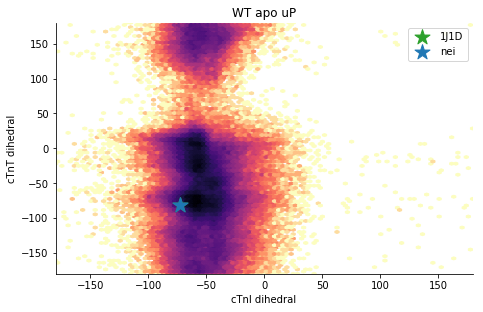

In [115]:
f, ax = plt.subplots(figsize=figure_dims(600, 0.9))
ax.hexbin(wtapoup[:, 0], wtapoup[:, 1], cmap='magma_r', mincnt=1, bins='log')
ax.scatter(xtal_dheds[0], xtal_dheds[1], label='1J1D', marker='*', s=250, color='tab:green')
ax.scatter(dtrajs_deg[6][537, 0], dtrajs_deg[6][537, 1], label='nei', marker='*', s=250, color='tab:blue')

sns.despine()
plt.legend(loc='best')
ax.set(xlabel=dihed_names[0], ylabel=dihed_names[1], title='WT apo uP')